<a href="https://colab.research.google.com/github/physedsnu/I-want-to-study-Data-Science/blob/master/n411/n411_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks) 과제

## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.

아래의 예시 생성 부분이 당장 이해 안가도 괜찮습니다. 넘파이를 활용해, 이런 다양한 일들을 할 수 있다는 점을 알아두시고, 궁금하신 분은 나중에 더 찾아보세요.

- np.append, np.vstack, np.hstack의 각각의 차이점에 대해 더 찾아보세요!

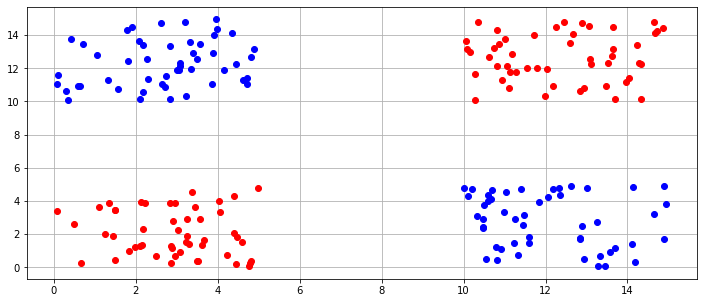

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다. 이진 분류를 위한 단층 퍼셉트론을 구현하기 위해 다음 빈칸에 들어갈 내용으로 알맞은 것은?

### 문제 1-1

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 7.0342 - accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 5.1053 - accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 3.1632 - accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 1.4854 - accuracy: 0.5050
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.3850
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.5600
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.6350
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.5050
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5600
Epoch 10/10
7/7 [==============================] - 0s 2ms/step


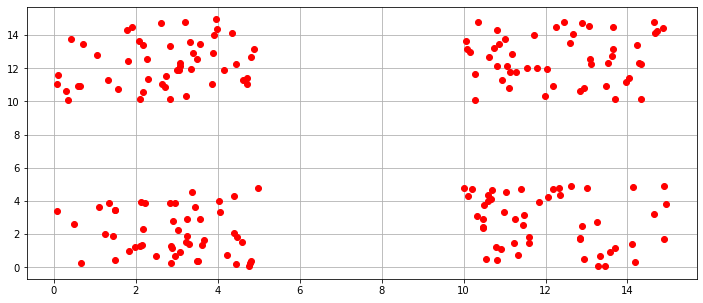

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

## 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 특징점(features): 1077 샘플 x 69 특징점 (변수), 
mouse_protein_X.xls 

데이터 label: 다운증후군 (1), 정상군 (2) 
mouse_protein_label.xls

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있다. 38 마리의 대조군 마우스와 34 마리의 trisomic mice (다운 증후군)가 총 72 마리로 각각 15번의 측정치가 등록되어 있는데 그 중에서 3개의 샘플이 측정이 안되어 총 1077개의 샘플이 있다. 라벨로는 다운증후군 1, 정상군 2로 할당 되어 있다. 

해당데이터는 다음과 같이 볼 수 있다. 


In [3]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [5]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [6]:
from sklearn.model_selection import train_test_split

df_label = df_label - 1
df_label.astype(object)

X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.2, random_state=42)

---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다.

4-5. F1 score 를 입력합니다. 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from sklearn.metrics import *

tf.random.set_seed(42)

In [8]:
# 레퍼런스는 신경망에 대해서만 제공됩니다. 머신러닝 방법론을 여러가지로 적용해보세요.
# 은닉층의 수, 은닉층 내부의 노드 수, 활성화 함수 등을 자유롭게 변형시키며 결과값을 비교해보세요.
# 옵티마이저를 다르게 해보거나 층마다 Dropout을 조절하며 결과값을 비교해보세요.

model = keras.Sequential(
    [
        layers.Dense(12, input_dim=69, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [9]:
# f1_score는 따로 구현하여야 합니다.
# 아래 링크를 참고한 후 f1_score까지 구해보세요.
# 함수의 파라미터를 늘리면 f_beta_score도 구현할 수 있습니다.

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['Accuracy','Precision','Recall']
)

[f1_score_in_keras](https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d)

In [10]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)  
)

Epoch 1/10
14/14 [==============================] - 4s 95ms/step - loss: 0.7323 - Accuracy: 0.4832 - precision: 0.4627 - recall: 0.5293 - val_loss: 0.7066 - val_Accuracy: 0.5185 - val_precision: 0.2308 - val_recall: 0.0309
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.7111 - Accuracy: 0.4797 - precision: 0.3021 - recall: 0.0707 - val_loss: 0.6998 - val_Accuracy: 0.4537 - val_precision: 0.3521 - val_recall: 0.2577
Epoch 3/10
14/14 [==============================] - 0s 18ms/step - loss: 0.7011 - Accuracy: 0.4739 - precision: 0.4464 - recall: 0.4366 - val_loss: 0.6943 - val_Accuracy: 0.4630 - val_precision: 0.3662 - val_recall: 0.2680
Epoch 4/10
14/14 [==============================] - 0s 11ms/step - loss: 0.6939 - Accuracy: 0.4739 - precision: 0.3799 - recall: 0.1659 - val_loss: 0.6855 - val_Accuracy: 0.5324 - val_precision: 0.4000 - val_recall: 0.0825
Epoch 5/10
14/14 [==============================] - 0s 14ms/step - loss: 0.6897 - Accuracy: 0.5017 - precisio

In [21]:
model_loss, model_acc, model_precision, model_recall  =  model.evaluate(X_test, y_test, verbose=0)
model_f1 = 2 * model_precision * model_recall / (model_precision + model_recall)
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


[링크를 참조하여 손수 작성해 봅니다](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)

In [23]:
\n precision : {precision_score(y_test, y_pred):.3f}\n recall : {recall_score(y_test, y_pred):.3f}\n f1_score : {f1_score(y_test, y_pred):.3f}')

('신경망', 0.606, 0.643, 0.278, 0.388)

In [29]:
print(f'신경망 \n accuracy : {model_acc:.3f}, \n precision : {model_precision:.3f}, \n recall : {model_recall:.3f}, \n f1_score : {model_f1:.3f}')


신경망 
 accuracy : 0.606, 
 precision : 0.643, 
 recall : 0.278, 
 f1_score : 0.388
